In [43]:
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df = pd.read_csv("TrainExer 3-1-corrected.txt", sep = "\t")

In [17]:
df.head()

,Year,Index,Dividends,Riskfree,LogEqPrem,BookMarket,NTIS,DivPrice,EarnPrice,Inflation
0,1927,17.66,0.77,0.0317,0.280823,0.374689,0.073955,-3.133,-2.767,-0.021176
1,1928,24.35,0.85,0.0426,0.313824,0.259667,0.042639,-3.355,-2.870,-0.009793
2,1929,21.45,0.97,0.0303,-0.112428,0.338458,0.165576,-3.096,-2.589,0.001830
3,1930,15.34,0.98,0.0148,-0.288025,0.554745,0.131525,-2.751,-2.761,-0.060665
4,1931,8.12,0.82,0.0241,-0.563742,1.170732,-0.011032,-2.293,-2.589,-0.095711


In [21]:
df["log_index_change"] = np.log(df.Index).diff()

In [23]:
df.head()

,Year,Index,Dividends,Riskfree,LogEqPrem,BookMarket,NTIS,DivPrice,EarnPrice,Inflation,log_index_change
0,1927,17.66,0.77,0.0317,0.280823,0.374689,0.073955,-3.133,-2.767,-0.021176,NaN
1,1928,24.35,0.85,0.0426,0.313824,0.259667,0.042639,-3.355,-2.870,-0.009793,0.321230
2,1929,21.45,0.97,0.0303,-0.112428,0.338458,0.165576,-3.096,-2.589,0.001830,-0.126807
3,1930,15.34,0.98,0.0148,-0.288025,0.554745,0.131525,-2.751,-2.761,-0.060665,-0.335261
4,1931,8.12,0.82,0.0241,-0.563742,1.170732,-0.011032,-2.293,-2.589,-0.095711,-0.636134


In [37]:
df.shape

(87, 11)

In [38]:
y,X = dmatrices("log_index_change~ BookMarket", df)

In [39]:
mod_ols = sm.OLS(y, X).fit()

In [40]:
print (mod_ols.summary())

                            OLS Regression Results                            
Dep. Variable:       log_index_change   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     7.299
Date:                Sun, 15 Apr 2018   Prob (F-statistic):            0.00835
Time:                        22:33:00   Log-Likelihood:                 21.244
No. Observations:                  86   AIC:                            -38.49
Df Residuals:                      84   BIC:                            -33.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1770      0.050      3.543      0.0

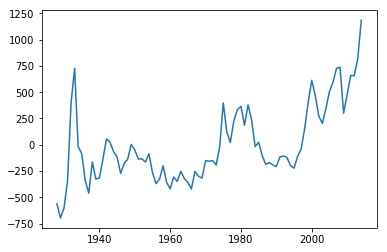

In [61]:
plt.plot([i+ 1928 for i in range(y.shape[0])], mod_ols.resid )

(b) Now regress the S&P500 index (without any kind of transformation) on a constant and the book-to-market
ratio. Consider whether the effect of book-to-market on the index is significant in this specification.

In [56]:
y, X = dmatrices("Index~ BookMarket", df)

In [57]:
mod_ols = sm.OLS(y, X).fit()

In [58]:
print (mod_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  Index   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     65.20
Date:                Sun, 15 Apr 2018   Prob (F-statistic):           4.00e-12
Time:                        22:40:42   Log-Likelihood:                -636.08
No. Observations:                  87   AIC:                             1276.
Df Residuals:                      85   BIC:                             1281.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1035.3473     95.019     10.896      0.0

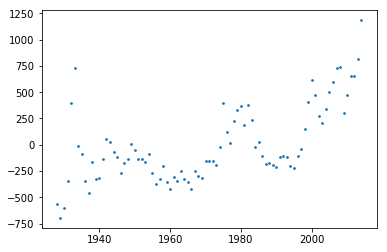

In [59]:
plt.scatter([i+ 1928 for i in range(y.shape[0])], mod_ols.resid , s = 3)